How do people's general propensity toward phobias relate to their movie preferences? Specifically, do people who have strong perceptions of fear tend to avoid horror movies? In this analysis, I will use the "Young People Survey" dataset from Kaggle. For more info on this dataset, please visit: https://www.kaggle.com/miroslavsabo/young-people-survey?select=responses.csv

The responses of interest from this dataset are 10 questions about phobias that responders rated from 1-5 ("not afraid at all", to "very afraid of"). There are also questions about movie preferences which contained a question about rating their preference toward horror movies from 1-5 ("don't enjoy at all", to "enjoy very much").

Let's examine the relationship between these responses!

In [1]:
import pandas as pd

df = pd.read_csv('datasets/responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
# select columns of interest

cols = ['Flying','Storm','Darkness','Heights','Spiders','Snakes','Rats','Ageing','Dangerous dogs','Fear of public speaking','Horror']
df2 = df[cols]
df2.head()

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Horror
0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0
1,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,2.0
2,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,3.0
3,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0,4.0
4,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,4.0


In [9]:
# take an average of fear responses - add as a new column

fear_avg = []
for row in range(len(df2)):
    fear_avg.append(df2.loc[row, :'Fear of public speaking'].mean())
df2['fear_avg'] = fear_avg
df2.head()

/var/folders/b7/kbc9pm217t92p0l_p84jfqhc0000gn/T/ipykernel_8266/3072028357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fear_avg'] = fear_avg


,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Horror,fear_avg
0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0,1.9
1,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,2.0,1.6
2,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,3.0,1.1
3,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0,4.0,3.6
4,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,4.0,1.8


In [10]:
df3 = df2[['fear_avg', 'Horror']]
df3.head()

,fear_avg,Horror
0,1.9,4.0
1,1.6,2.0
2,1.1,3.0
3,3.6,4.0
4,1.8,4.0


<BarContainer object of 5 artists>

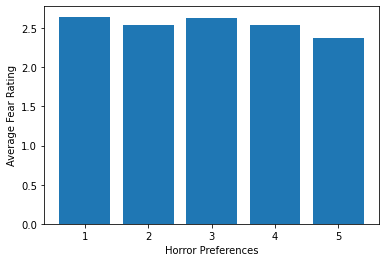

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.sort(df3['Horror'].dropna().unique())
y = df3.groupby('Horror').mean()['fear_avg']

fig, ax = plt.subplots()
ax.set_xlabel('Horror Preferences')
ax.set_ylabel('Average Fear Rating')
ax.bar(x, y)

Judging by the looks of this bar graph, there does appear to be a negative relationship with fear ratings and horror preferences, although it is quite small. Unfortunately, since we do not have continuous data for horror preferences, we cannot test for a correlation, but we can test for a significant difference in the means of fear ratings for the highest and lowest horror preferences.

In [54]:
from scipy.stats import ttest_ind_from_stats as ttest

horror_1_mean = df3[df3['Horror'] == 1.0].mean()['fear_avg']
horror_1_std = df3[df3['Horror'] == 1.0].std()['fear_avg']
horror_1_num_obs = len(df3[df3['Horror'] == 1.0])

horror_5_mean = df3[df3['Horror'] == 5.0].mean()['fear_avg']
horror_5_std = df3[df3['Horror'] == 5.0].std()['fear_avg']
horror_5_num_obs = len(df3[df3['Horror'] == 5.0])

statistic, pvalue = ttest(horror_1_mean, horror_1_std, horror_1_num_obs, horror_5_mean, horror_5_std, horror_5_num_obs, alternative='greater')

In [55]:
statistic

3.4656639535926113

In [56]:
pvalue

0.00029196595562085224

The result is significant! It turns out that our respondents with low preference toward horror movies have significantly higher general fear ratings than respondents with high preference toward horror movies. Wow!